<h1>Titanic Survival Predictions </h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
titanic_df = pd.read_csv("train.csv")
titanic_df.index = titanic_df.PassengerId

In [4]:
#replace nan age with mean age
titanic_df["Age"].fillna(titanic_df["Age"].mean(),inplace = True)

In [5]:
#male = 0 female = 1
titanic_df["Sex"] = titanic_df["Sex"].replace({"male" : "0", "female" : "1"})
titanic_df["Sex"] = titanic_df["Sex"].map(lambda v: round(float(v)))

In [6]:
titanic_df.rename(columns = {"Sex" : "Female"}, inplace = True)
titanic_df = titanic_df.drop(["PassengerId", "Name","Ticket","Cabin", "Embarked"], axis = 1)

In [7]:
titanic_df.groupby("Survived").mean()

,Pclass,Female,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.147541,30.415100,0.553734,0.329690,22.117887
1,1.950292,0.681287,28.549778,0.473684,0.464912,48.395408


In [8]:
features = ["Pclass", "Female", "Age", "SibSp", "Parch", "Fare"]
X = titanic_df[features]
y = titanic_df["Survived"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_df = pd.DataFrame(cnf_matrix)
cnf_df

,0,1
0,115,13
1,31,64


Text(0.5,0,'Actual')

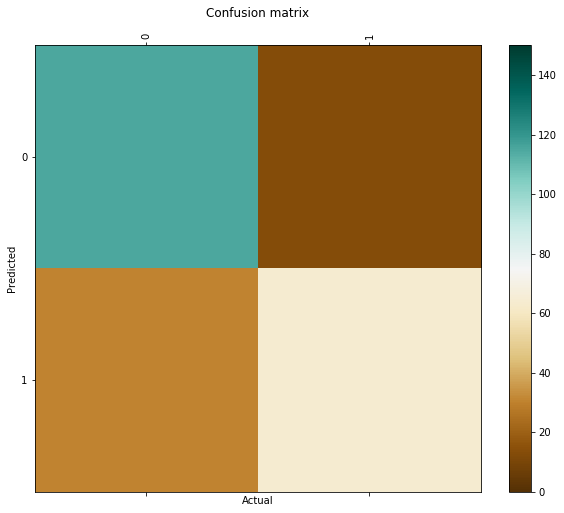

In [22]:
ax = mpl.pyplot.matshow(
    cnf_df, 
    cmap=plt.cm.BrBG, 
    vmin=0, 
    vmax=150 
)
ax.figure.set_size_inches(10, 8 )
ax.axes.set_xticklabels( [''] + list(cnf_df.columns), rotation='vertical' )
ax.axes.set_yticklabels( [''] + list(cnf_df.index), rotation='horizontal' )
ax.figure.colorbar(ax)
plt.title('Confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8026905829596412
